### Instrument Recognition
- Goal : Process the recording and provide list of all musical instruments used.
- InstrumentRecognition_GroundTruth - contains the actual instruments used as I was present there.
- Double checked for human error by me. :P
- Actions taken till now :
    1. Created GitHub repository, cloned locally.
    2. Added the files containing the recording and the ground truth.
    3. Conversation with PPR about the idea of the project.
- Action to be taken now :
    1. PPR recommends that the first step is to load the datafile and try to process the audio into a Python array.
- Thoughts :
    1. Google the same.
- Results :
    1. Google search term : "https://www.google.com/search?client=safari&rls=en&q=parse+audio+file+into+an+array+in+python&ie=UTF-8&oe=UTF-8"
    2. First result : https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3
    3. Method employed to learn : Depth First Search
    4. After the first set of issues, I've resorted to Breadth First Search.
    5. The result which worked : https://stackoverflow.com/questions/50535637/how-to-load-m4a-file-in-python
    6. Next Google Search Term : pydub audiosegment to numpy array
    7. First Result : https://stackoverflow.com/questions/38015319/how-to-create-a-numpy-array-from-a-pydub-audiosegment
    

In [1]:
from pydub import AudioSegment
import numpy as np
theAudio = AudioSegment.from_file("NewRecording3.m4a")

In [2]:
theAudio

In [3]:
theArray = theAudio.get_array_of_samples()

In [4]:
theArray = np.array(theArray)

In [5]:
type(theArray)

numpy.ndarray

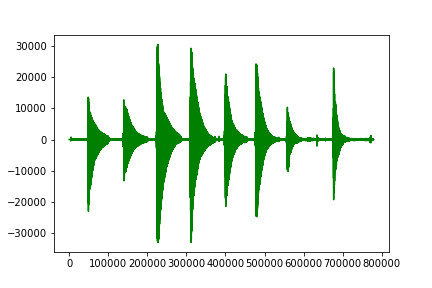

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
%matplotlib widget

if plt:
    plt.close() 
    

plt.figure("New Recording 2")
plt.plot(theArray,"green")
plt.show()

### Task 1 Complete.
- The audio file is now parsed as a numpy array - "theArray"
- Date : 04/12/2022

### Task 2 : Plot a spectrogram.
- A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. 
- Wiki : https://en.wikipedia.org/wiki/Spectrogram


In [7]:
import librosa
theAudio, sr = librosa.load("NewRecording3.m4a")

/Users/suddu/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


/Users/suddu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


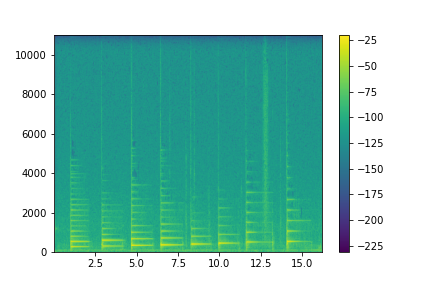

In [29]:
if plt:
    plt.close()
plt.specgram(theAudio[0:1000000],NFFT=1000, Fs=sr, noverlap=100)
plt.colorbar()
plt.show()

In [9]:
valuesOfSpecGram = plt.specgram(theAudio,NFFT=1000, Fs=sr, noverlap=100)

In [10]:
type(valuesOfSpecGram)

tuple

In [11]:
type(valuesOfSpecGram[0])

numpy.ndarray

In [12]:
type(valuesOfSpecGram[0][0])

numpy.ndarray

In [13]:
type(valuesOfSpecGram[0][0][0])

numpy.float64

In [14]:
valuesOfSpecGram[0][0][0]

0.0

In [15]:
spectogram_np = valuesOfSpecGram[0]

In [16]:
spectogram_np.shape

(501, 397)

### Notes on Task 2.
- To obtain the spectrogram, we had to use a different recording.<br>
- I played the piano notes and recording with this Macbook Air.<br>
- Spectrogram plotted successfully.<br>
- Next step was to sum all values with axis=1.<br>
- The result from the spectrogram is a 4D array as we can see above.
<br>

### Pending task.
- Parse the 4D array - "valueOfSpecGram"<br>

In [30]:
sumOfSpectogram = np.sum(spectogram_np, axis=0)

In [31]:
sumOfSpectogram = np.expand_dims(sumOfSpectogram, axis=0)

In [32]:
sumOfSpectogram.shape

(1, 397)

In [33]:
sumOfSpectogram

array([[0.00000000e+00, 3.53286573e-08, 3.13489116e-06, 1.32347348e-07,
        4.53009829e-08, 1.52835443e-07, 1.91137694e-07, 2.96651365e-07,
        1.34104667e-07, 2.38677553e-07, 2.14617036e-07, 1.78523963e-07,
        6.11857367e-08, 5.21105057e-08, 9.66614453e-08, 2.74987212e-07,
        3.94594516e-08, 2.04351604e-07, 8.57408540e-08, 3.82370340e-08,
        2.36386619e-08, 9.35404081e-08, 9.63088984e-08, 3.94448176e-08,
        2.84895591e-04, 3.36614889e-03, 1.79457130e-03, 1.97489179e-03,
        1.67493849e-03, 1.17058886e-03, 9.40758380e-04, 7.60628539e-04,
        5.90855269e-04, 4.81028208e-04, 3.95973916e-04, 3.35427235e-04,
        2.66600771e-04, 2.20430895e-04, 1.85469660e-04, 1.50400178e-04,
        1.22931631e-04, 9.83726605e-05, 8.23836967e-05, 6.53571082e-05,
        5.61841748e-05, 4.71876455e-05, 3.86104086e-05, 2.90769310e-05,
        2.28222938e-05, 1.94060056e-05, 1.56197198e-05, 3.90951486e-06,
        8.39341848e-07, 1.94191009e-07, 5.70529975e-08, 8.638529

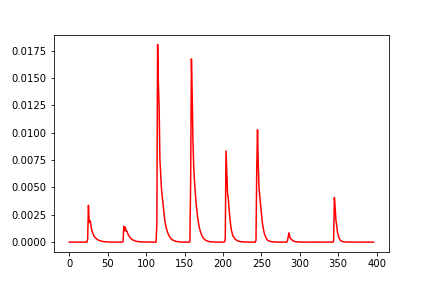

In [70]:
if plt:
    plt.close()
plt.plot(sumOfSpectogram[0],color="red")
plt.show()


In [37]:
outputName = []
for eachItem in sumOfSpectogram[0]:
    if eachItem > 0.0001:
        outputName.append(1)
    else:
        outputName.append(0)


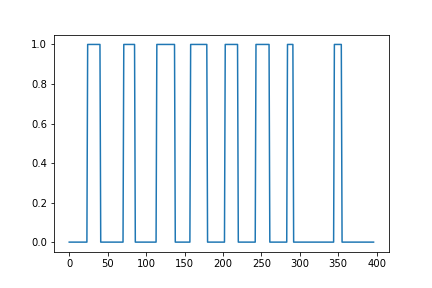

In [40]:
if plt:
    plt.close()
    
plt.plot(outputName)

In [54]:
specNP = np.transpose(spectogram_np,(1,0))

In [55]:
specNP.shape

(397, 501)

In [56]:
spectogram_np.shape

(501, 397)

/Users/suddu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

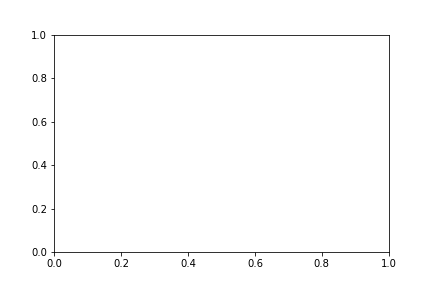

In [79]:
if plt:
    plt.close()

plt.plot(resultMax)
plt.show()

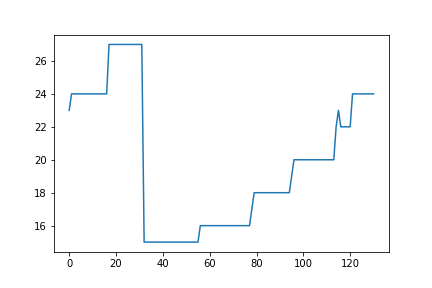

In [71]:
if plt:
    plt.close()

plt.plot(frequency)
plt.show()